<h2>Importando libs necessárias</h2>

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer

# um classificador linear que utiliza o Gradiente Descendente Estocástico como método de treino. 
# Por padrão, utiliza o estimador SVM.
from sklearn.linear_model import SGDClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

<h2>Carregando e limitando o subconjunto do dataset de treino</h2>

In [4]:
categories = ['talk.politics.misc', 'rec.autos']

# Limitando o conjunto de dados
## subset => subconjunto de treino definido
## shuffle => embaralha os dados, garantindo aleatoriedade e impedindo que o modelo seja tendencioso
## random_state => fator que indica o quão embaralhados os dados estarão
twenty_train = fetch_20newsgroups(subset='train',categories=categories, shuffle=True, random_state=42)

<h1>Obtendo feedback de alguns dados</h1>

In [6]:
# nome das categorias
print(twenty_train.target_names)

['rec.autos', 'talk.politics.misc']


In [5]:
# 10 últimas categorias do conjunto de dados de treino
twenty_train.target[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [7]:
# Nomes das categorias
for t in twenty_train.target[:10]:
    print(twenty_train.target_names[t])

talk.politics.misc
talk.politics.misc
talk.politics.misc
rec.autos
talk.politics.misc
talk.politics.misc
rec.autos
talk.politics.misc
talk.politics.misc
talk.politics.misc


<h2>Treinando o classificador</h2>

In [8]:
# Usando o TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf_vectorize = vectorizer.fit_transform(twenty_train.data)

In [13]:
## loss => função de perda
## penalty => indicica a penalidade para evitar overfitting
## alpha => taxa de aprendizado
## randon_state => fator que indica o quão embaralhados os dados estarão
## max_iter => numero de interações do modelo
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
# Treinando o classificador
clf.fit(X_train_tfidf_vectorize, twenty_train.target)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

<h2>Avaliando a performance do modelo</h2>

In [14]:
# Carregando os dados de teste
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
docs_test = twenty_test.data

# Transformando em representação numérica
vect_transform = vectorizer.transform(docs_test)
# Fazendo a predição dos dados
predicted = clf.predict(vect_transform)

# Emitindo relatório
print(metrics.classification_report(twenty_test.target, predicted,target_names=twenty_test.target_names))

# Imprimindo a ordem das classes
print(clf.classes_)

                    precision    recall  f1-score   support

         rec.autos       0.92      0.99      0.96       396
talk.politics.misc       0.99      0.90      0.94       310

         micro avg       0.95      0.95      0.95       706
         macro avg       0.96      0.94      0.95       706
      weighted avg       0.95      0.95      0.95       706

[0 1]


<h2>Matriz de confusão</h2>

In [15]:
confusion_matrix = confusion_matrix(twenty_test.target, predicted)
print(confusion_matrix)

[[393   3]
 [ 32 278]]


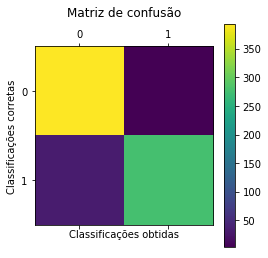

In [18]:
# Plotando o gráfico
plt.matshow(confusion_matrix)
plt.title("Matriz de confusão\n")
plt.colorbar()
plt.ylabel("Classificações corretas")
plt.xlabel("Classificações obtidas")
plt.show()

<h2>Predição com novos dados</h2>

In [19]:
# Novo conjunto de dados para a predição
docs_new = [
    'Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House.',
    'By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show.'
]

# Vetorizando os dados
X_new_tfidf_vectorize = vectorizer.transform(docs_new)

# Obtendo a predição
predicted = clf.predict(X_new_tfidf_vectorize)

# Imprimindo o resultado da classifcação
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'Wednesday morning, the legal team had appeared to turn back toward more discreet lawyering, with the announcement that Washington trial lawyer Emmet Flood would join the team inside the White House.' => talk.politics.misc
'By the time Rolls-Royce unveiled its one-of-a-kind Serenity Phantom at the 2015 Geneva Motor Show.' => rec.autos
